# Pyemma workflow

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pyemma
import os
import glob
from pyemma.util.contexts import settings

# Data

### Load data

Load pdb file and trajectories using `pyemma.coordinates.load`.

In [2]:
# set overall data path
datapath = 'D:/Dropbox/Cofilin_oligomer/umbrella_sampling/4BEX-assembly_screening_KQBIAS_500-1000-1500/139-139_KQBIAS-1000/'

In [3]:
# load pdb file and trajectories using coordinates.load

# set file path
#pdb_file = os.path.join(datapath, f'3HAK_ion.pdb')
wham_file = [os.path.join(datapath+f'{i}'+'/wham.dat') for i in range(27,40)]
wham_file

['D:/Dropbox/Cofilin_oligomer/umbrella_sampling/4BEX-assembly_screening_KQBIAS_500-1000-1500/139-139_KQBIAS-1000/27/wham.dat',
 'D:/Dropbox/Cofilin_oligomer/umbrella_sampling/4BEX-assembly_screening_KQBIAS_500-1000-1500/139-139_KQBIAS-1000/28/wham.dat',
 'D:/Dropbox/Cofilin_oligomer/umbrella_sampling/4BEX-assembly_screening_KQBIAS_500-1000-1500/139-139_KQBIAS-1000/29/wham.dat',
 'D:/Dropbox/Cofilin_oligomer/umbrella_sampling/4BEX-assembly_screening_KQBIAS_500-1000-1500/139-139_KQBIAS-1000/30/wham.dat',
 'D:/Dropbox/Cofilin_oligomer/umbrella_sampling/4BEX-assembly_screening_KQBIAS_500-1000-1500/139-139_KQBIAS-1000/31/wham.dat',
 'D:/Dropbox/Cofilin_oligomer/umbrella_sampling/4BEX-assembly_screening_KQBIAS_500-1000-1500/139-139_KQBIAS-1000/32/wham.dat',
 'D:/Dropbox/Cofilin_oligomer/umbrella_sampling/4BEX-assembly_screening_KQBIAS_500-1000-1500/139-139_KQBIAS-1000/33/wham.dat',
 'D:/Dropbox/Cofilin_oligomer/umbrella_sampling/4BEX-assembly_screening_KQBIAS_500-1000-1500/139-139_KQBIAS-100

In [4]:
# load
data = []
for i in range(len(wham_file)):
#     data += [np.append(np.loadtxt(wham_file[i])[:, 1], np.loadtxt(wham_file[i])[:, 3])]
    data += [np.loadtxt(wham_file[i])[:, 1]] 
    # dicard the first 5 rows and choose the second column which is global Q

In [5]:
# check data dimension
print(len(data), data[0].shape)

13 (801,)


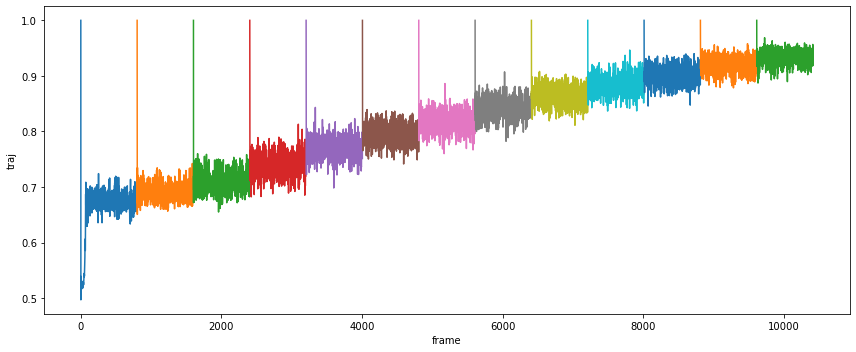

In [6]:
plot_data = data

fig, ax = plt.subplots(figsize=(12, 5))
start = 0
for i in range(len(plot_data)):
    x = np.arange(start, start + plot_data[i].shape[0])
    start += plot_data[i].shape[0]
    ax.plot(x, plot_data[i])
    ax.set_ylabel(f'traj')
    ax.set_xlabel('frame')
fig.tight_layout()

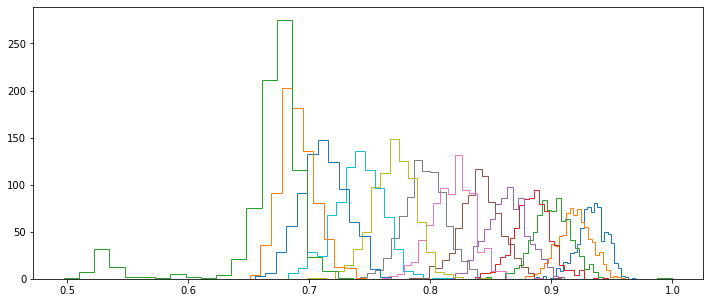

In [7]:
plot_data2 = data[::-1]
#plt.plot(np.concatenate(plot_data2))


fig, ax = plt.subplots(figsize=(12, 5))
for i in range(len(plot_data2)):

    ax.hist(plot_data2[i], bins=40, histtype='step')
#     ax.set_ylabel(f'traj')
#     ax.set_xlabel('frame')


# Discretization and Lag time

choose clusters, find lag time, MSM validate

## K-means Centers

In [8]:
cluster_50 = pyemma.coordinates.cluster_kmeans(data, k=50, max_iter=50)
cluster_200 = pyemma.coordinates.cluster_kmeans(data, k=200, max_iter=50)

initialize kmeans++ centers:   0%|                                                              | 0/50 [00:00<…

kmeans iterations:   0%|                                                                        | 0/50 [00:00<…

initialize kmeans++ centers:   0%|                                                             | 0/200 [00:00<…

kmeans iterations:   0%|                                                                        | 0/50 [00:00<…

## Predefined Centers

In [9]:
# all_.min(), all_.max()

In [10]:
all_ = np.concatenate(data)
n_centers = 300
discretize_centers = np.linspace(all_.min(), all_.max(), n_centers).reshape(-1,1)

discretize_centers_100 = np.linspace(all_.min(), all_.max(), 100).reshape(-1,1)
discretize_centers_300 = np.linspace(all_.min(), all_.max(), 300).reshape(-1,1)

In [11]:
discrete_data = pyemma.coordinates.assign_to_centers(data=data, centers=discretize_centers)

getting output of AssignCenters:   0%|                                                          | 0/13 [00:00<…

In [12]:
discrete_data_100 = pyemma.coordinates.assign_to_centers(data=data, centers=discretize_centers_100)
discrete_data_300 = pyemma.coordinates.assign_to_centers(data=data, centers=discretize_centers_300)

getting output of AssignCenters:   0%|                                                          | 0/13 [00:00<…

getting output of AssignCenters:   0%|                                                          | 0/13 [00:00<…

# WHAM

In [13]:
us_centers = list(np.arange(0.675, 1, 0.025))
us_bias_k = [1000] * 13
wham_100 = pyemma.thermo.estimate_umbrella_sampling(
    data, discrete_data_100, us_centers, us_bias_k,
    maxiter=100000, maxerr=1.0E-8, save_convergence_info=1,
    estimator='wham',kT=0.593)

wham_300 = pyemma.thermo.estimate_umbrella_sampling(
    data, discrete_data_300, us_centers, us_bias_k,
    maxiter=100000, maxerr=1.0E-8, save_convergence_info=1,
    estimator='wham',kT=0.593)

wham_k50 = pyemma.thermo.estimate_umbrella_sampling(
    data, cluster_50.dtrajs, us_centers, us_bias_k,
    maxiter=100000, maxerr=1.0E-8, save_convergence_info=1,
    estimator='wham',kT=0.593)

wham_k200 = pyemma.thermo.estimate_umbrella_sampling(
    data, cluster_200.dtrajs, us_centers, us_bias_k,
    maxiter=100000, maxerr=1.0E-8, save_convergence_info=1,
    estimator='wham',kT=0.593)


WHAM:   0%|                                                                                 | 0/100000 [00:00<…

WHAM:   0%|                                                                                 | 0/100000 [00:00<…

getting output of KmeansClustering:   0%|                                                       | 0/13 [00:00<…

WHAM:   0%|                                                                                 | 0/100000 [00:00<…

getting output of KmeansClustering:   0%|                                                       | 0/13 [00:00<…

WHAM:   0%|                                                                                 | 0/100000 [00:00<…

In [14]:
# not sure what's the meaning of this line
# x,y= np.loadtxt('fisDNA_300_pmf.dat',usecols=(0,1),unpack=True)

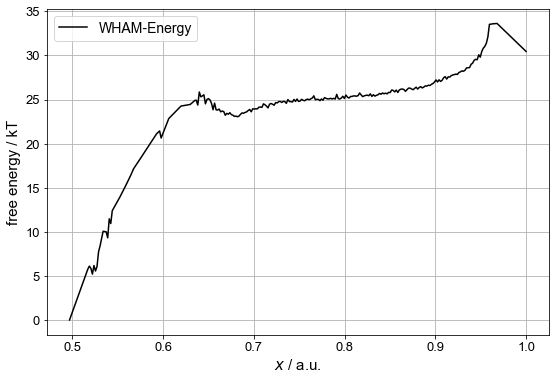

In [15]:
kmeans_centers_50 = cluster_50.clustercenters.copy()
kmeans_centers_200 = cluster_200.clustercenters.copy()

x_k50 = kmeans_centers_50[wham_k50.active_set, 0]
y_k50 = wham_k50.f

x_k200 = kmeans_centers_200[wham_k200.active_set, 0]
y_k200 = wham_k200.f


x_100 = discretize_centers_100[wham_100.active_set, 0]
y_100 = wham_100.f

x_300 = discretize_centers_300[wham_300.active_set, 0]
y_300 = wham_300.f

mpl.rc('font',family='Arial')

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(x_300, y_300, color='black', label="WHAM-Energy")
# ax.plot(x_300, y_300, 's', label="WHAM-300")
# ax.plot(x_100, y_100, 's', label="WHAM-100")

# ax.plot(x_k50, y_k50, 'o', label="WHAM-k50")
# ax.plot(x_k200, y_k200, 'o', label="WHAM-k200")

# plt.xlim([0.58,1.0])
# plt.ylim([0,15])

ax.set_xlabel(r"$x$ / a.u.",fontsize=15)
ax.set_ylabel(r"free energy / kT",fontsize=15)
ax.legend(fontsize=14)
# ax.legend(fancybox=True, framealpha=0.5)
ax.grid()
ax.tick_params(labelsize=13)
plt.savefig('./WHAM_energy_profile_139-139_4BEX-assembly_K=1000.png',dpi=1200)
plt.show()

In [16]:
print (x_300.shape,y_300.shape)

file = open("pmf_4BEX_assembly.txt", "w")
for index in range(len(x_300)):
    file.write(str(x_300[index]) + " " + str(y_300[index]) + "\n")
file.close()

(227,) (227,)
